In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [10]:
grouped_df = df.groupby('Дата')['Количество'].count().reset_index()

Вывести несколько первых строк сгруппированных данных

In [11]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

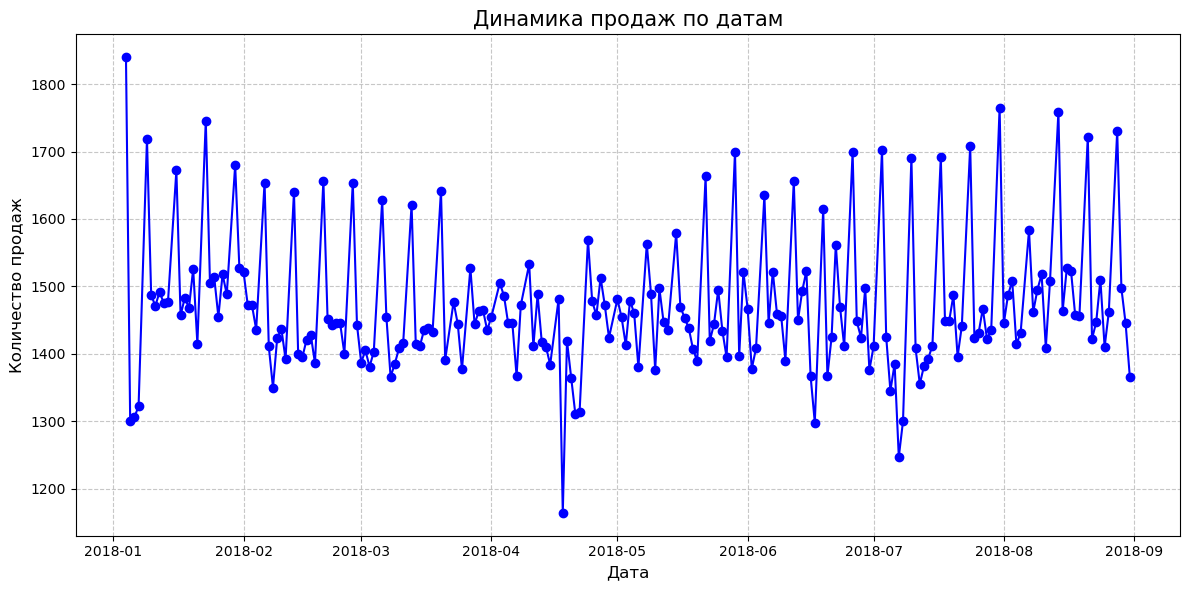

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b' )
plt.title('Динамика продаж по датам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
В целом продажи держатся на стабильном уровне — в основном в диапазоне 1400–1500.
Видны регулярные колебания: почти постоянно есть подъёмы и спады, резких долгих провалов нет.
Иногда встречаются пики продаж — значения доходят до 1700–1800, особенно ближе к лету.
Есть и редкие просадки (примерно до 1200–1300), но они единичные и быстро компенсируются ростом.
Начиная с весны и ближе к лету заметно, что пиков становится больше, то есть продажи периодически растут выше среднего.
Явного тренда на постоянный рост или падение нет — скорее умеренная стабильность с сезонными всплесками.
Продажи в течение периода в целом стабильны, с регулярными колебаниями и отдельными всплесками, особенно во второй половине показанного интервала.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [20]:
max_outlier_index = df['Количество'].idxmax()
max_outlier_row = df.loc[max_outlier_index]

print("Строка с максимальным выбросом:")
print(max_outlier_row)

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [23]:
df_base = df[(df['Склад'] == 3) & (df['Дата'].dt.dayofweek == 2)]

for month_num, month_name in zip([6, 7, 8], ['Июнь', 'Июль', 'Август']):
    monthly_data = df_base[df_base['Дата'].dt.month == month_num]
    top_product = monthly_data.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False).head(1)
    
    if not top_product.empty:
        print(f"{month_name}: {top_product.index[0]} (продано {top_product.values[0]} шт.)")
    else:
        print(f"{month_name}: данных за среды на 3 складе нет")

Июнь: product_1 (продано 616 шт.)
Июль: product_1 (продано 696 шт.)
Август: product_1 (продано 955 шт.)


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [49]:
weather_Astana = pd.read_excel('weather.xls')

In [51]:
avg_weather = weather_Astana.groupby('Дата')['T'].mean().reset_index()

In [54]:
new_table = avg_weather.merge(grouped_df, on='Дата', how='inner')

In [55]:
new_table

,Дата,T,Количество
0,2018-01-04,-13.0875,1840
1,2018-01-05,-17.2500,1301
2,2018-01-06,-14.1250,1306
3,2018-01-07,-12.3375,1322
4,2018-01-09,-7.3875,1719
...,...,...,...
200,2018-08-26,12.0500,1462
201,2018-08-28,14.1000,1731
202,2018-08-29,14.0375,1497
203,2018-08-30,14.1625,1445


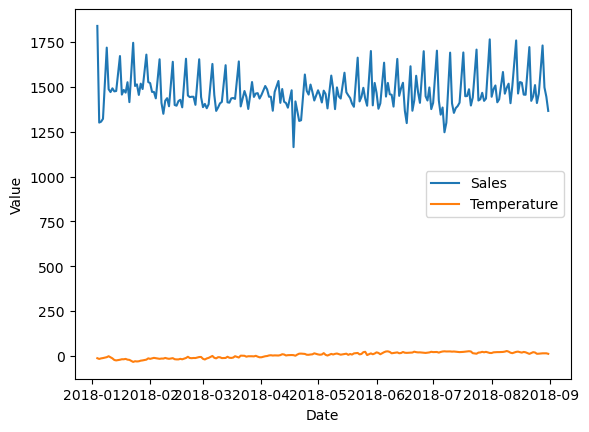

In [60]:
plt.figure()
plt.plot(new_table['Дата'], new_table['Количество'], label='Sales')
plt.plot(new_table['Дата'], new_table['T'], label='Temperature')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

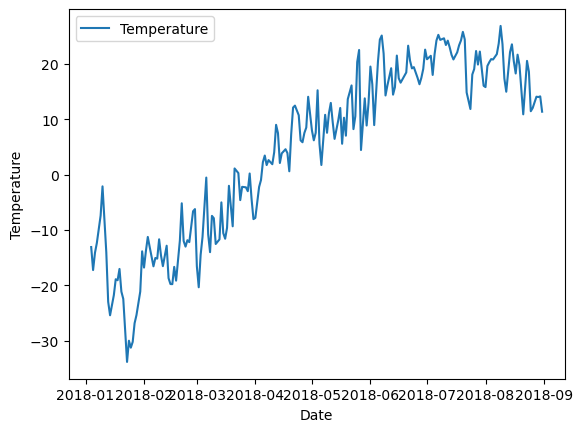

In [61]:
plt.figure()
plt.plot(new_table['Дата'], new_table['T'], label='Temperature')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()